#   **A Data Driven Crop Recommendation System**
---

## **1. Introduction**
This project explores how environmental and soil factors affect crop suitability.  Using a crop  dataset, exploratory data analysis (EDA), statistical testing (ANOVA), and predictive modeling are used  to identify the most influential factors that determine which crops thrive under specific conditions.

### **Objectives**
1. Understand the relationship between environmental and soil parameters. 

2. Identify statistically significant factors influencing crop growth. 

3. Build interpretable predictive models to recommend suitable crops.
  
4. Compare environmental vs soil-based model performance.  

## **2. Dataset Description**

The dataset contains agricultural observations for multiple crop types, with features representing both soil nutrients (Nitrogen, Phosphorous, Potassium, pH) and environmental factors (temperature, humidity, rainfall).  

| Column | Description |
|---------|--------------|
| N | Nitrogen content in soil |
| P | Phosphorus content |
| K | Potassium content |
| temperature | Average temperature (°C) |
| humidity | Relative humidity (%) |
| ph | Soil pH value |
| rainfall | Average rainfall (mm) |
| label | Crop type |



##  **3. Data Exploration**
Importing Libraries and Loading Data

I'll use Python libraries such as pandas, numpy, matplotlib, seaborn, and scipy for data analysis and statistical testing.

Performing initial checks to understand dataset shape, missing values, data types, and descriptive statistics.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Loading ...
df = pd.read_csv("Crop_recommendation.csv")
df.sample(n = 10, random_state = 7)

,N,P,K,temperature,humidity,ph,rainfall,label
1849,34,15,34,27.058265,91.105104,5.677283,224.700695,coconut
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
1963,112,49,25,25.689595,77.906210,6.470135,66.194268,cotton
237,49,55,78,18.655801,16.177727,7.863114,81.707693,chickpea
717,50,58,23,27.813269,62.504605,7.596802,69.755555,blackgram
54,95,52,36,26.229169,83.836258,5.543360,286.508373,rice
1940,108,46,17,24.301800,84.876690,6.932215,65.024787,cotton
1499,106,16,54,28.960179,91.695322,6.585873,24.745820,muskmelon
887,40,61,22,20.949818,65.810876,7.002216,44.239130,lentil
593,18,36,23,24.018254,53.766234,7.214079,35.034044,mothbeans


In [175]:
# Checking Missing Records
df.isna().sum(axis= 1)

0       0
1       0
2       0
3       0
4       0
       ..
2195    0
2196    0
2197    0
2198    0
2199    0
Length: 2200, dtype: int64

In [176]:
# Summary statistics
df.describe(include='all')

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [177]:
# Data types
df.info()

# There are  no missing values. Theere are 220 records and  8 features.
# The dataset contains a mix of integers, decimals and string data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## **4. Data Visualization and Correlation**

Exploring relationships between variables using visualizations such as histograms, scatterplots and heatmaps to uncover patterns and potential interdependencies.


### 4.1 Environmental Factor Distribution

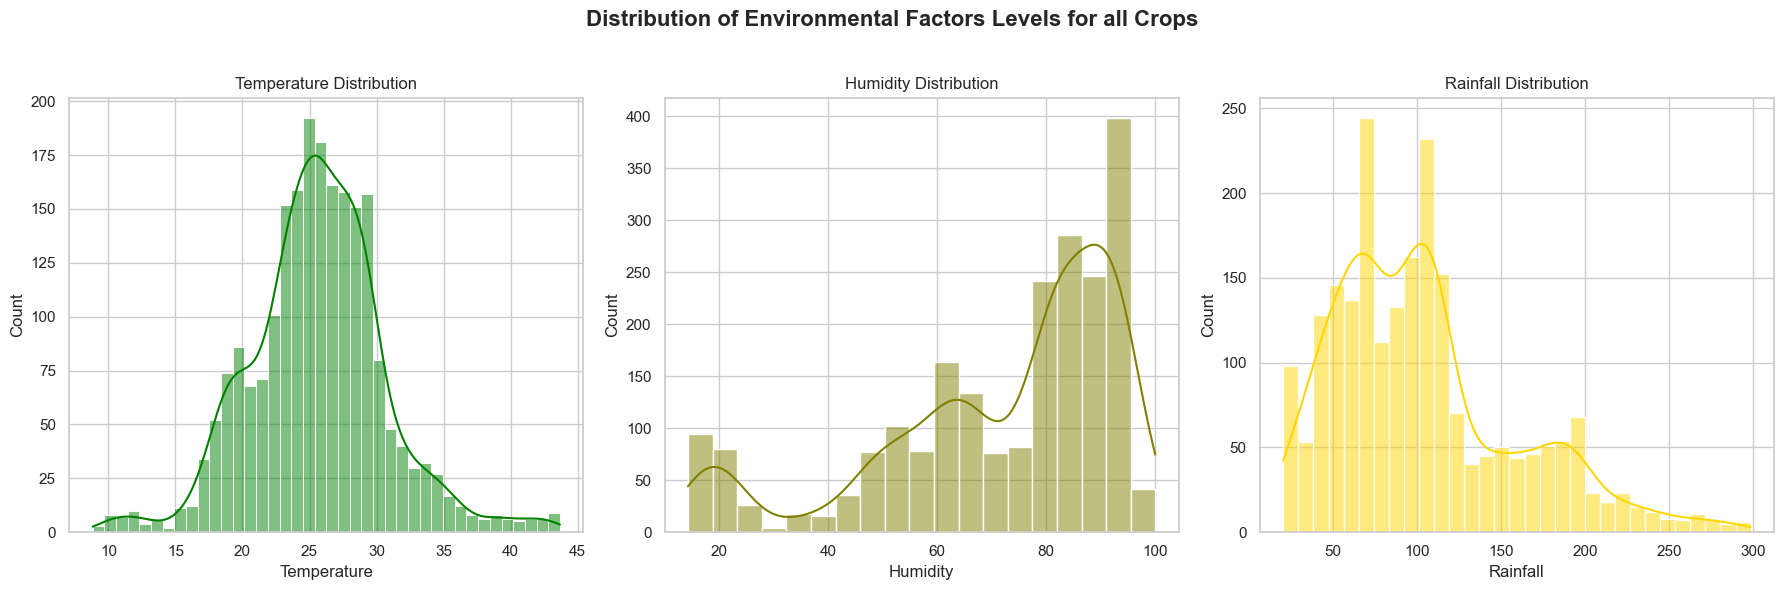

In [178]:
# Creating visualizations for Temperature, Humidity, and Rainfall
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle("Distribution of Environmental Factors Levels for all Crops\n", fontsize =  16, fontweight = 'bold')

# Temperature Distribution
sns.histplot(df['temperature'], 
             kde = True, 
             color = "green", 
             ax = axes[0]
             )
axes[0].set_title('Temperature Distribution')
axes[0].set_xlabel("Temperature")

# Humidity Distribution
sns.histplot(df['humidity'], 
             kde = True, 
             color = "olive", 
             ax = axes[1]
             )
axes[1].set_title('Humidity Distribution')
axes[1].set_xlabel("Humidity")

# Rainfall Distribution
sns.histplot(df['rainfall'], 
             kde = True, 
             color = "gold", 
             ax = axes[2]
             )
axes[2].set_title('Rainfall Distribution')
axes[2].set_xlabel("Rainfall")


plt.tight_layout()
plt.show()

- Temperature follows a near-normal distribution, mostly between 20 to 30 degree C, indicating moderate climatic conditions suitable for most crops.

- Humidity displays a bimodal pattern; the dataset covers both dry and high humid crop environments, providing good climatic diversity.  

- Rainfall is positively skewed, with most observations below 120 mm; many crops are grown under low to moderate rainfall conditions.


### 4.2 Soil Nutrient Distribution
#### 4.2.1 Nitrogen Distribution

For each crop variety, the distribution of Nitrogen content is different, so to effectively compare in a histogram, it is imporatnt that we make bin distribtion the same.

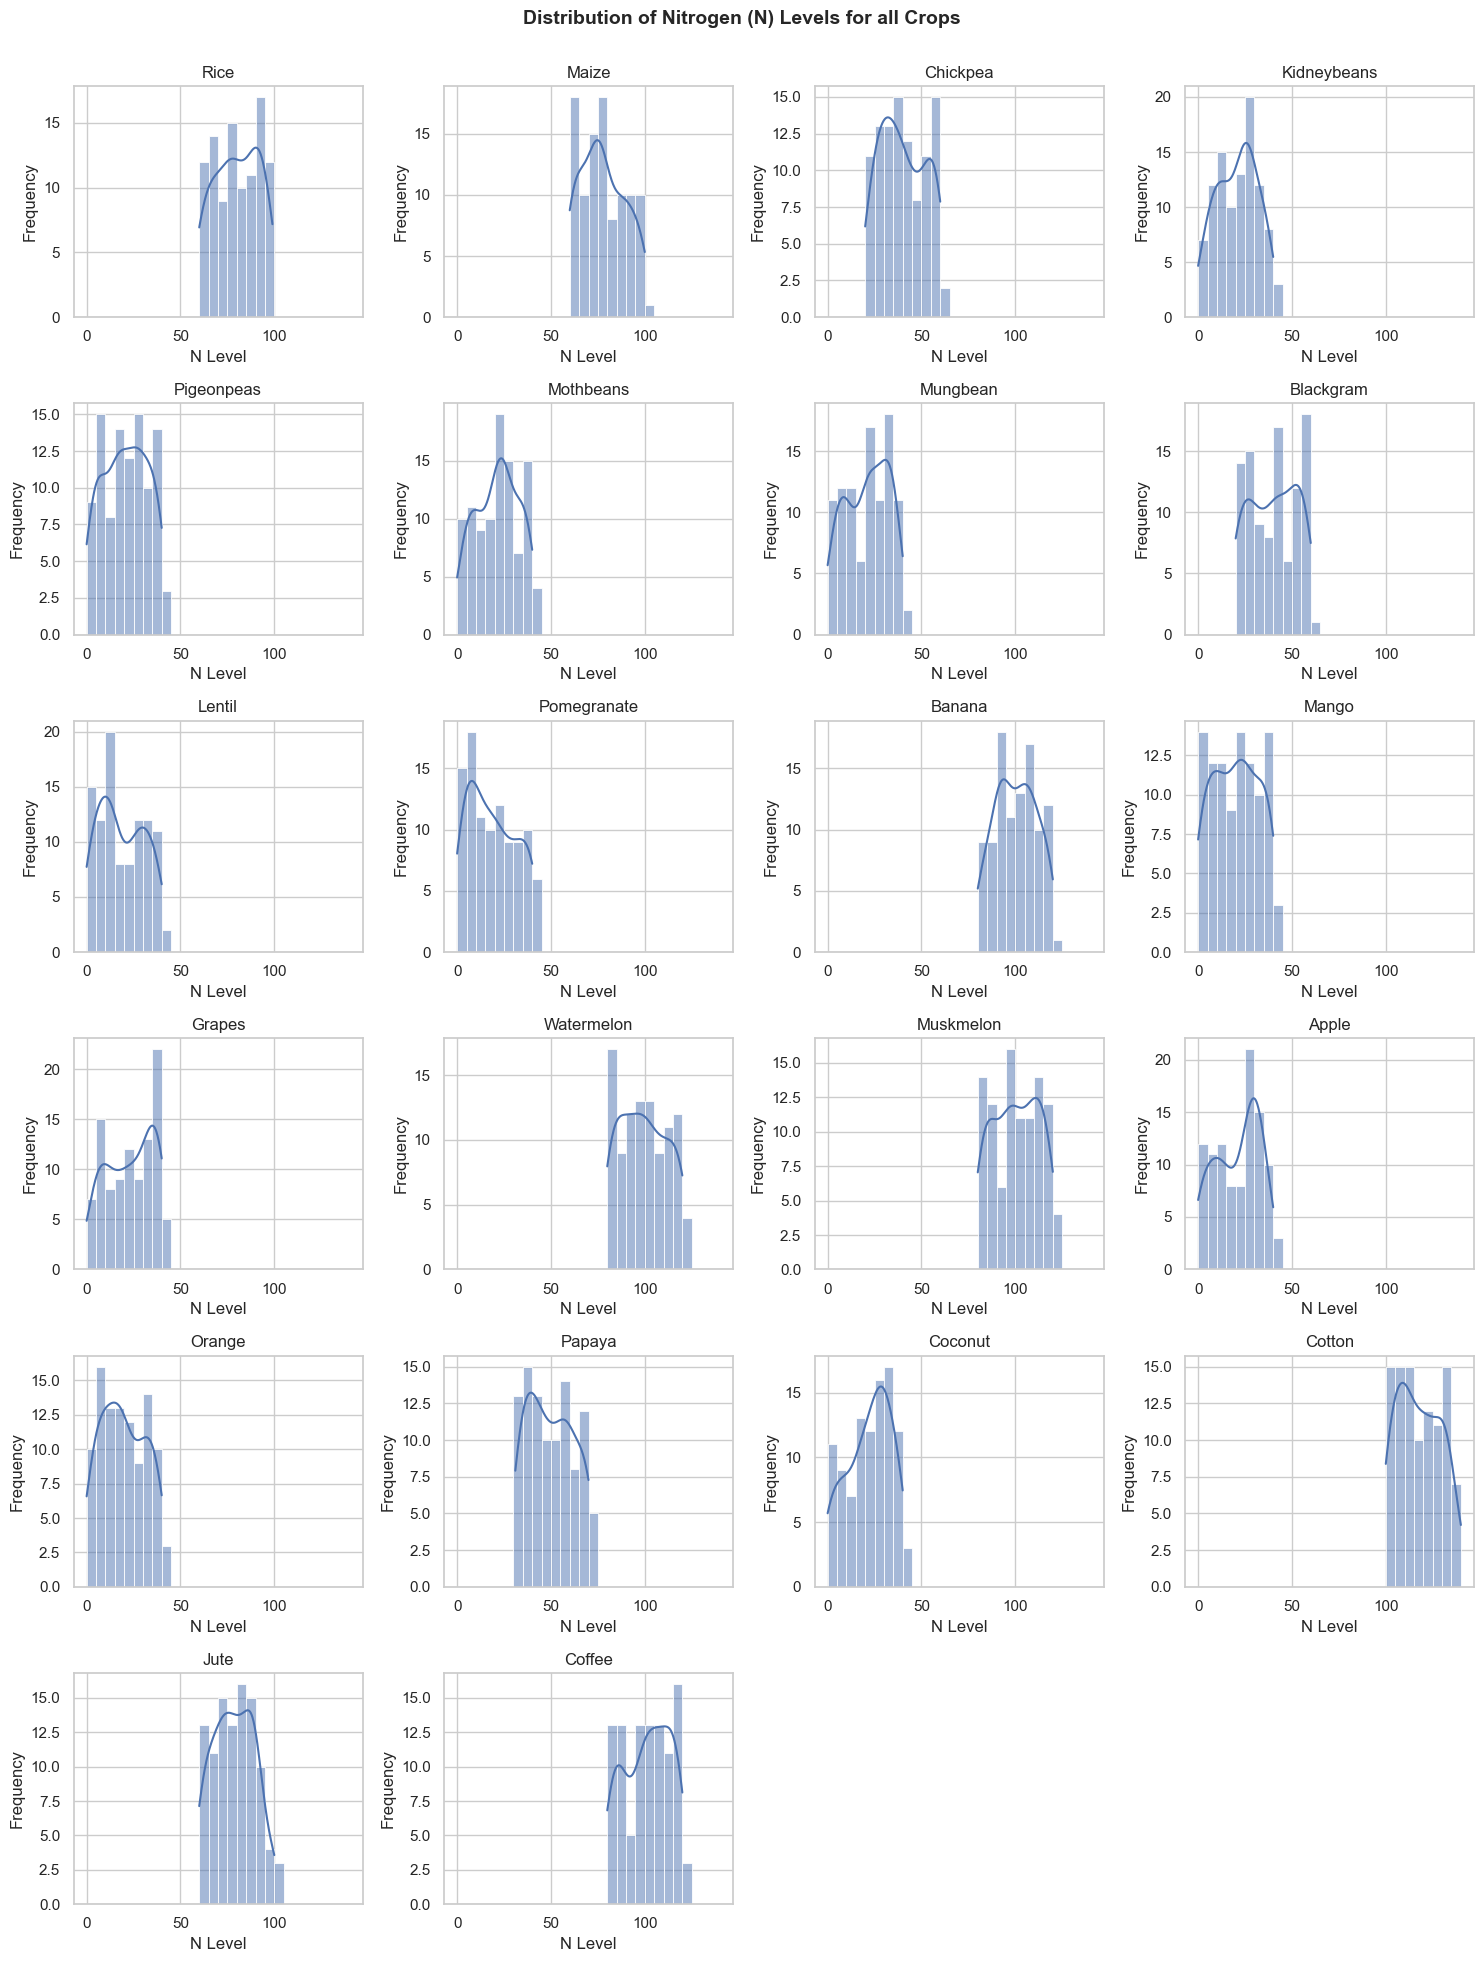

In [179]:
# Creating a list of unique crop label
crop_list = df['label'].unique()

# Defining minimum and maximum level of Nitrogen
N_min = df["N"].min()
N_max = df["N"].max()
bins = range(int(N_min), int(N_max) + 5, 5)  # each bin width is 5 and x labels goes from 0 to 140

# Plotting
plt.figure(figsize=(15, 20))
plt.suptitle("Distribution of Nitrogen (N) Levels for all Crops\n\n", fontsize =  14, fontweight = 'bold')

for i, crop in enumerate(crop_list, 1):
    plt.subplot(len(crop_list)//4 + 1, 4, i)  # adjust grid shape
    sns.histplot(data=df[df['label'] == crop]["N"], kde = True, bins = bins, stat = 'count', edgecolor = 'white')
    plt.title(crop.capitalize())
    plt.xlabel("N Level")
    plt.ylabel("Frequency")
    
                
plt.tight_layout()
plt.show()

**Observations**

- Most crops show moderate to high N levels, mainly between 40 – 100 units.  

- Legumes and cereals (like chickpea, kidneybeans, and maize) display higher N concentrations.  

- Distributions are generally broad and slightly right-skewed, displaying varied nitrogen uptake.  

- Fruit crops show more scattered distributions, reflecting diverse nitrogen requirements.

#### 4.2.2 Phosphorous Distribution

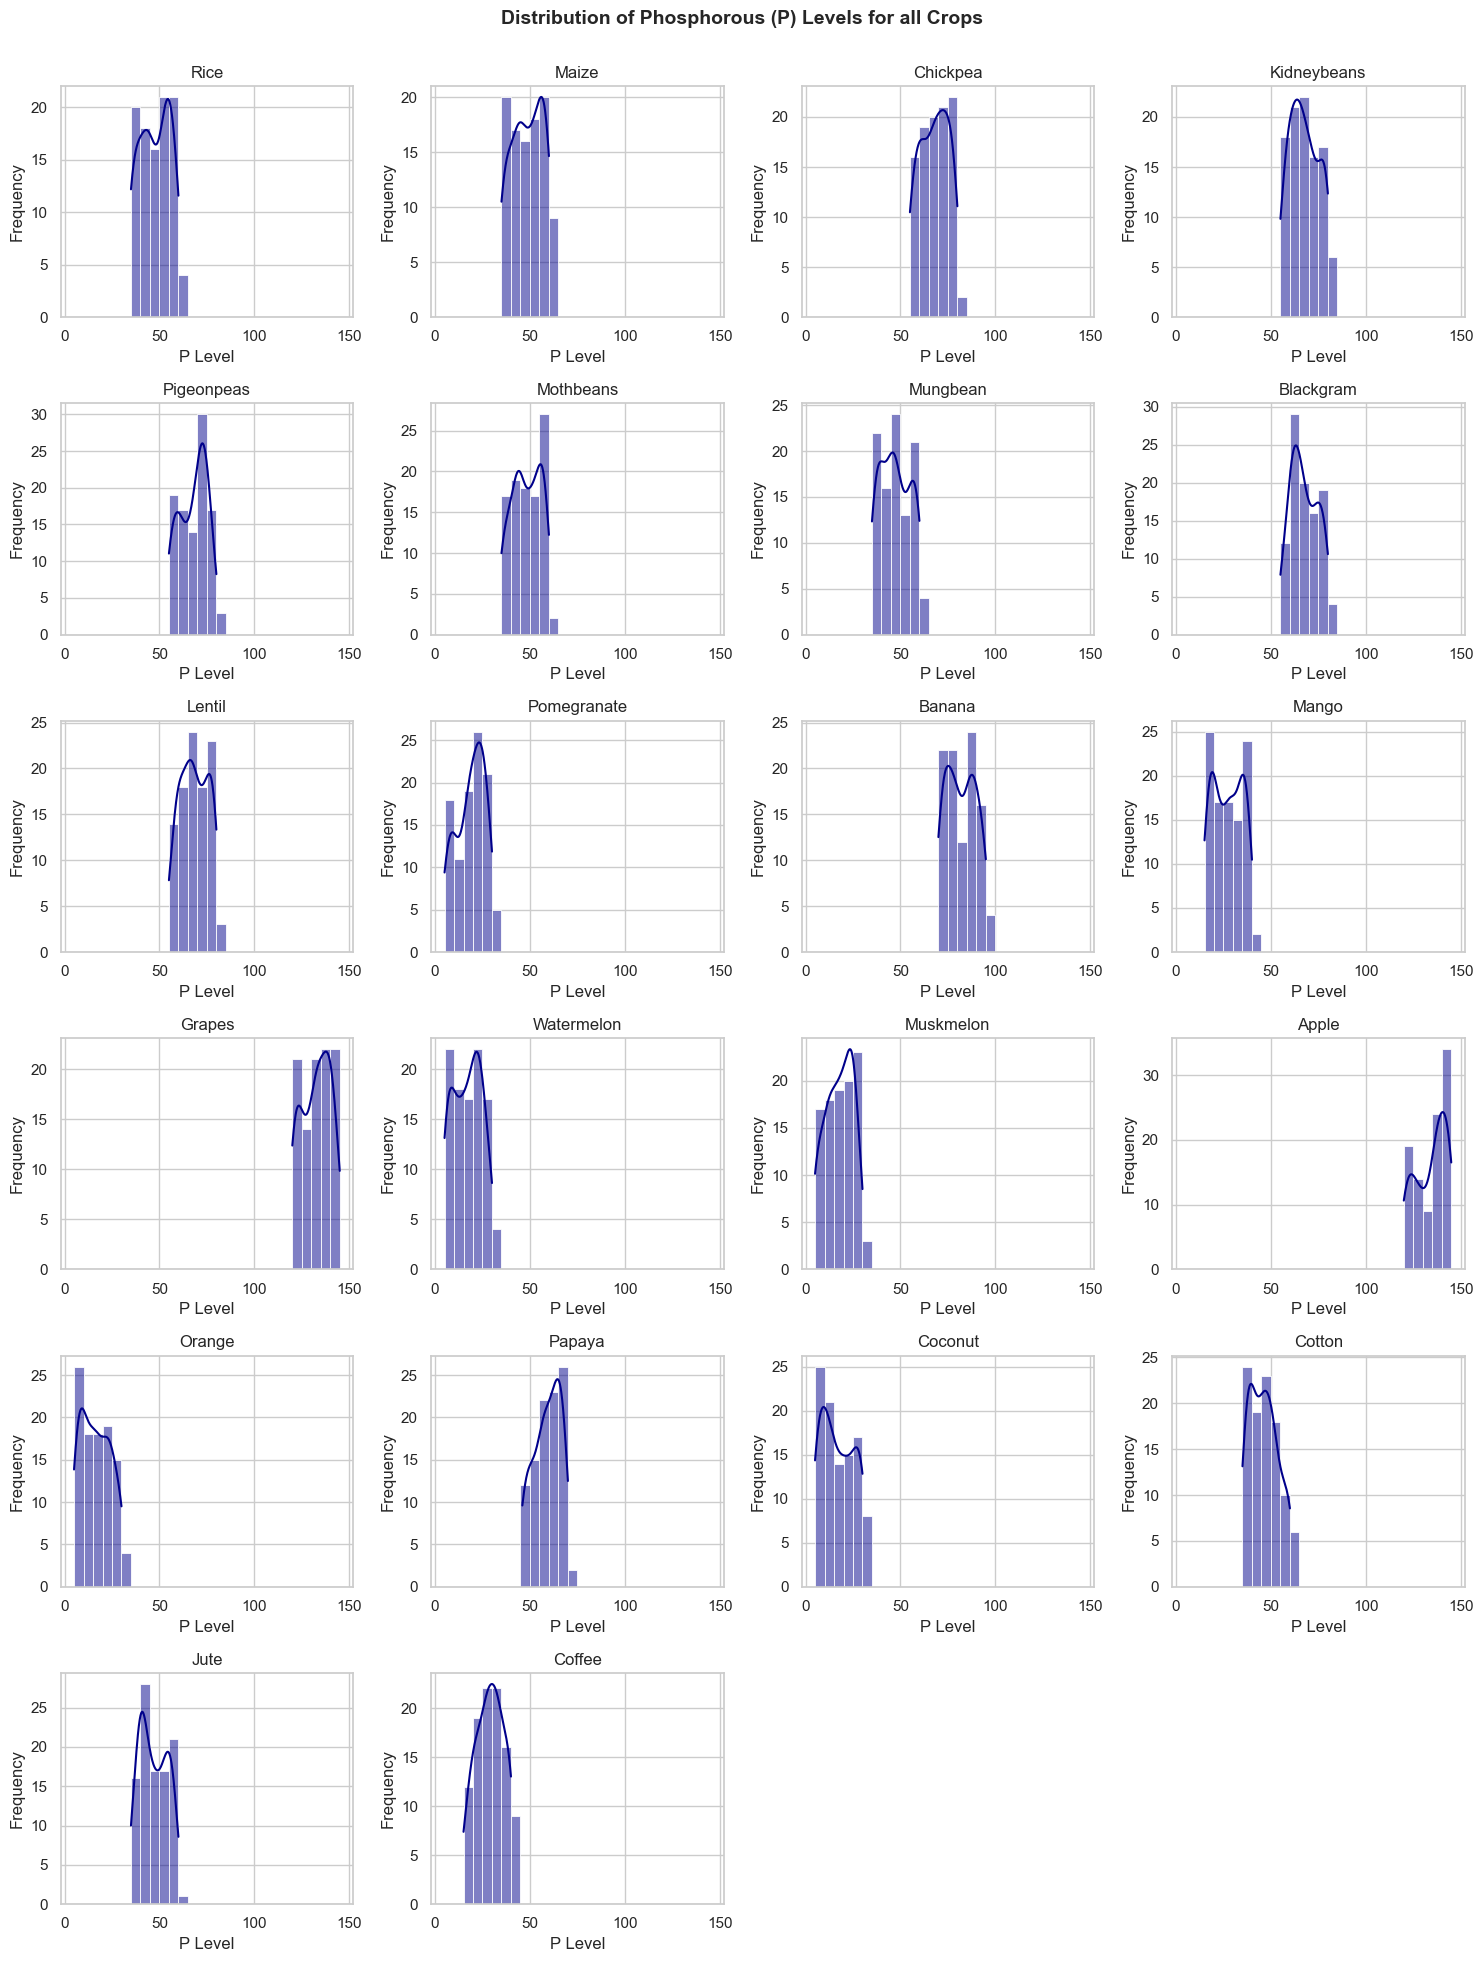

In [180]:
# Defining minimum and maximum level of Phosphorous
P_min = df['P'].min()
P_max = df['P'].max()

bins = range(int(P_min), int(P_max)+ 5,5)
bins

# Plotting
plt.figure(figsize= (15,20))

plt.suptitle("Distribution of Phosphorous (P) Levels for all Crops\n\n", fontsize = 14, fontweight = 'bold')
for i, crop in enumerate(crop_list,1):
    plt.subplot(len(crop_list)//4 + 1, 4, i)
    sns.histplot(data = df[df['label'] == crop], x = "P", bins  = bins, kde = True, edgecolor = 'white', color= 'darkblue')
    plt.title(crop.capitalize())
    plt.ylabel("Frequency")
    plt.xlabel("P Level")
    
plt.tight_layout()
plt.show()
    

**Observations**

- Most crops show moderate P levels, generally between 40 – 90 units.  

- A few crops like Apple, Grapes, and Cotton exhibit higher P levels (up to 150).  

- Distributions are mostly right - skewed,  lower P levels are more common.  

- Cereals and pulses have narrower P ranges, while fruits show wider variation.

#### 4.2.3 Potassium Distribution

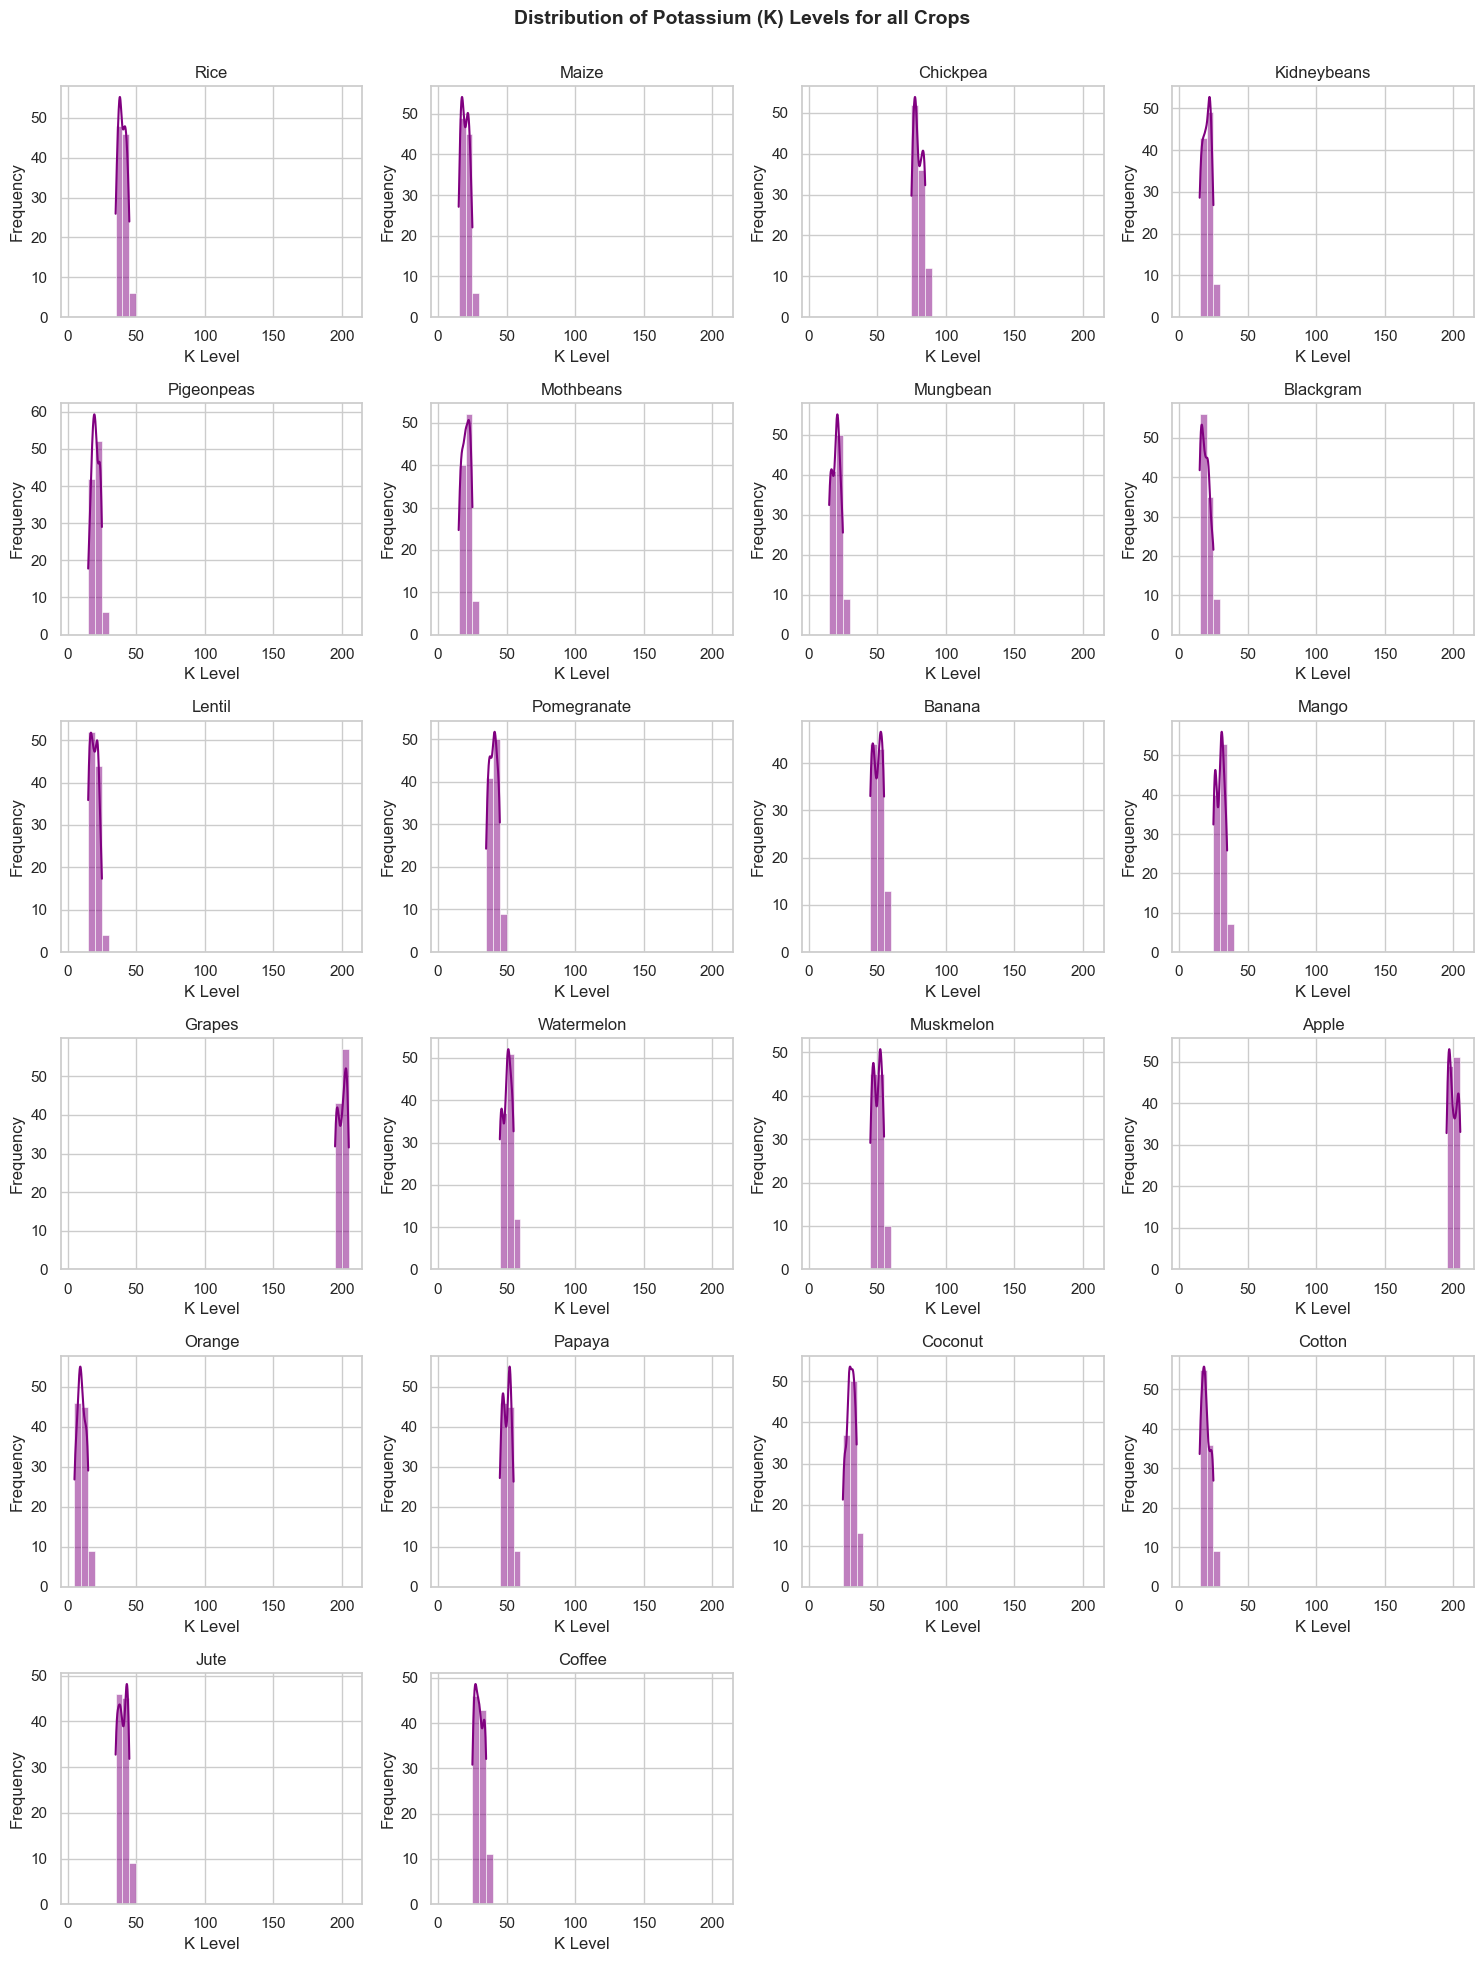

In [181]:
# Defining minimum and maximum level of Potassium
K_min = df['K'].min()
K_max = df['K'].max()

bins = range(int(K_min), int(K_max)+ 5,5)
bins

plt.figure(figsize= (15,20))

# Plotting
plt.suptitle("Distribution of Potassium (K) Levels for all Crops\n\n", fontsize = 14, fontweight = 'bold')
for i, crop in enumerate(crop_list,1):
    plt.subplot(len(crop_list)//4 + 1, 4, i)
    sns.histplot(data = df[df['label'] == crop], x = "K", bins  = bins, kde = True, edgecolor = 'white', color= 'purple')
    plt.title(crop.capitalize())
    plt.ylabel("Frequency")
    plt.xlabel("K Level")
    
plt.tight_layout()
plt.show()
    

**Observations**
- Most crops show moderate P levels, generally between 40-90 units.  

- A few crops like apple, grapes exhibit higher P levels (up to 200).  

- Distributions are mostly right-skewed, indicating lower P levels are more common.  

- Cereals and pulses have narrower P ranges, while fruits show wider variation.

### 4.3 Pairwise Environmental Relationships 

To make my visualizations more meaningful and easier to interpret, I featured engineered the 22 individual crop labels into broader categories - cereal_grains, pulses_legumes, fruits, fiber_crops, and beverage. This grouping reflects how crops are commonly classified in the agriculture industry and helps simplify the data without losing important context. By organizing related crops together, the analysis highlights key patterns and trends across major crop types, making the visuals cleaner, more balanced, and easier to communicate insights effectively.


In [182]:
# Cereal and grain crops
df_cereal_grains = df[df['label'].isin(['rice','maize'])].reset_index(drop = True)
df_cereal_grains.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [183]:
# Pulses and Legumes
df_pulses_legumes = df[df['label'].isin(['blackgram','chickpea','kidneybeans','lentil','mungbean','mothbeans','pigeonpeas'])].reset_index(drop = True)
df_pulses_legumes.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,40,72,77,17.024985,16.988612,7.485996,88.551231,chickpea
1,23,72,84,19.020613,17.131591,6.920251,79.926981,chickpea
2,39,58,85,17.887765,15.405897,5.996932,68.549329,chickpea


In [184]:
# Fruit crops
df_fruits = df[df['label'].isin(['mango','banana','papaya','orange','grapes','pomegranate','watermelon','muskmelon','apple'])].reset_index(drop = True)
df_fruits.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,2,24,38,24.559816,91.635362,5.922936,111.968462,pomegranate
1,6,18,37,19.656901,89.937010,5.937650,108.045893,pomegranate
2,8,26,36,18.783596,87.402477,6.804781,102.518476,pomegranate


In [185]:
# Fiber crops
df_fiber_crops = df[df['label'].isin(['cotton','jute'])].reset_index(drop = True)
df_fiber_crops.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,133,47,24,24.402289,79.197320,7.231325,90.802236,cotton
1,136,36,20,23.095956,84.862757,6.925412,71.295811,cotton
2,104,47,18,23.965635,76.976967,7.633437,90.756167,cotton


In [186]:
# Beverage crops
df_beverage = df[df['label'].isin(['coffee','coconut'])].reset_index(drop = True)
df_beverage.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,18,30,29,26.762749,92.860569,6.420019,224.590366,coconut
1,37,23,28,25.612944,94.313884,5.740055,224.320676,coconut
2,13,28,33,28.130115,95.648076,5.686973,151.076190,coconut


To understand how environmental factors influence crop patterns, the following questions guided the scatterplot analysis:

- Which crops prefer hot & humid vs. cool & dry conditions?

- How do rainfed crops differ from dryland crops?

- Which crops thrive in acidic soils under high rainfall? 


#### 4.3.1 Cereal Crops

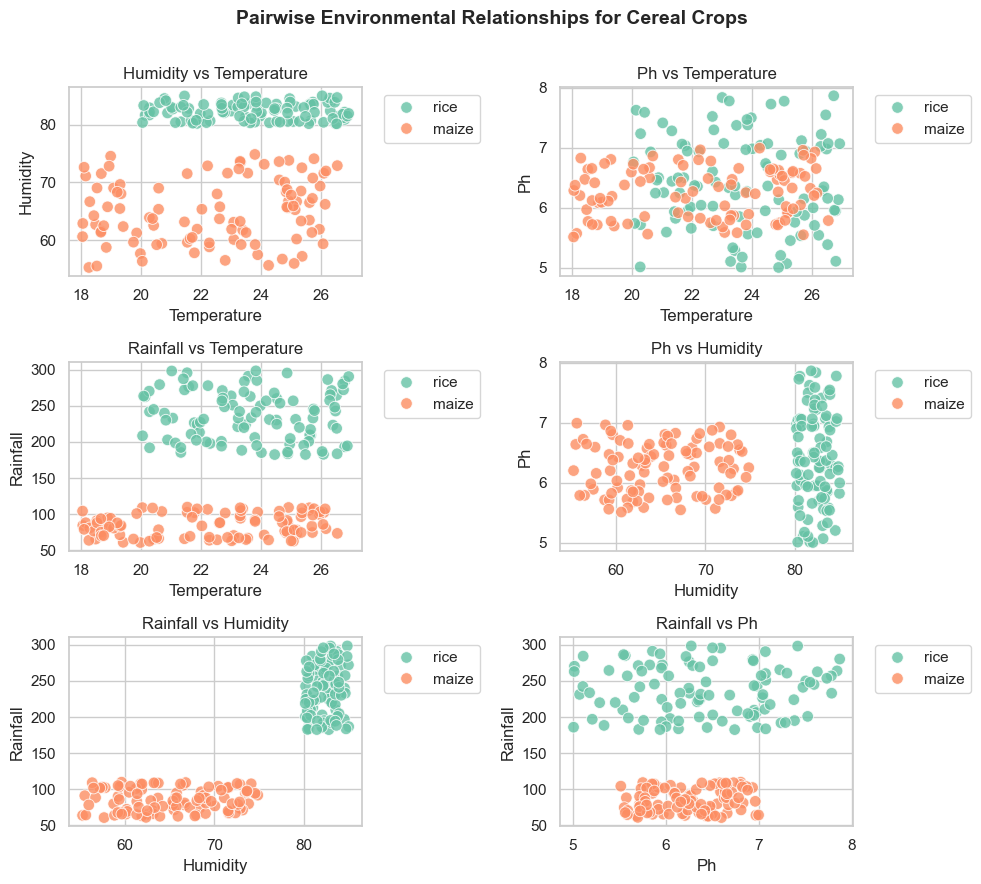

In [249]:
import itertools

# Select the relevant features and target
features = ['temperature', 'humidity', 'ph', 'rainfall']
target = 'label'

# Generate all unique combinations of feature pairs
feature_combinations = list(itertools.combinations(features, 2))

# Set up subplot grid (adjust automatically based on number of combinations)
n_plots = len(feature_combinations)
n_cols = 2
n_rows = (n_plots + 1) // n_cols

plt.figure(figsize=(10, 3 * n_rows))

# Loop through each combination and plot in a subplot
for idx, (x_feature, y_feature) in enumerate(feature_combinations, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.scatterplot(
        data = df_cereal_grains,
        x = x_feature,
        y = y_feature,
        hue = target,
        palette = 'Set2',
        alpha = 0.8,
        s = 70
    )
    plt.suptitle("Pairwise Environmental Relationships for Cereal Crops\n", fontsize = 14, fontweight = 'bold' )
    plt.title(f"{y_feature.capitalize()} vs {x_feature.capitalize()}")
    plt.xlabel(x_feature.capitalize())
    plt.ylabel(y_feature.capitalize())
    plt.legend(title=False, bbox_to_anchor=(1.05, 1), loc='upper left')
    
plt.tight_layout()

plt.show()

**Environmental Relationship Insights for Cereal Crop**

- Rice prefers hot and humid conditions, while maize thrives better in cooler and drier environments.

- Rice is a rainfed crop needing high rainfall and moisture, whereas maize is a dryland crop suited to limited water availability.

- Rice performs well in slightly acidic soils (pH ~5.5–6.5) combined with high rainfall.


#### 4.3.2 Pulses and Legume Crops

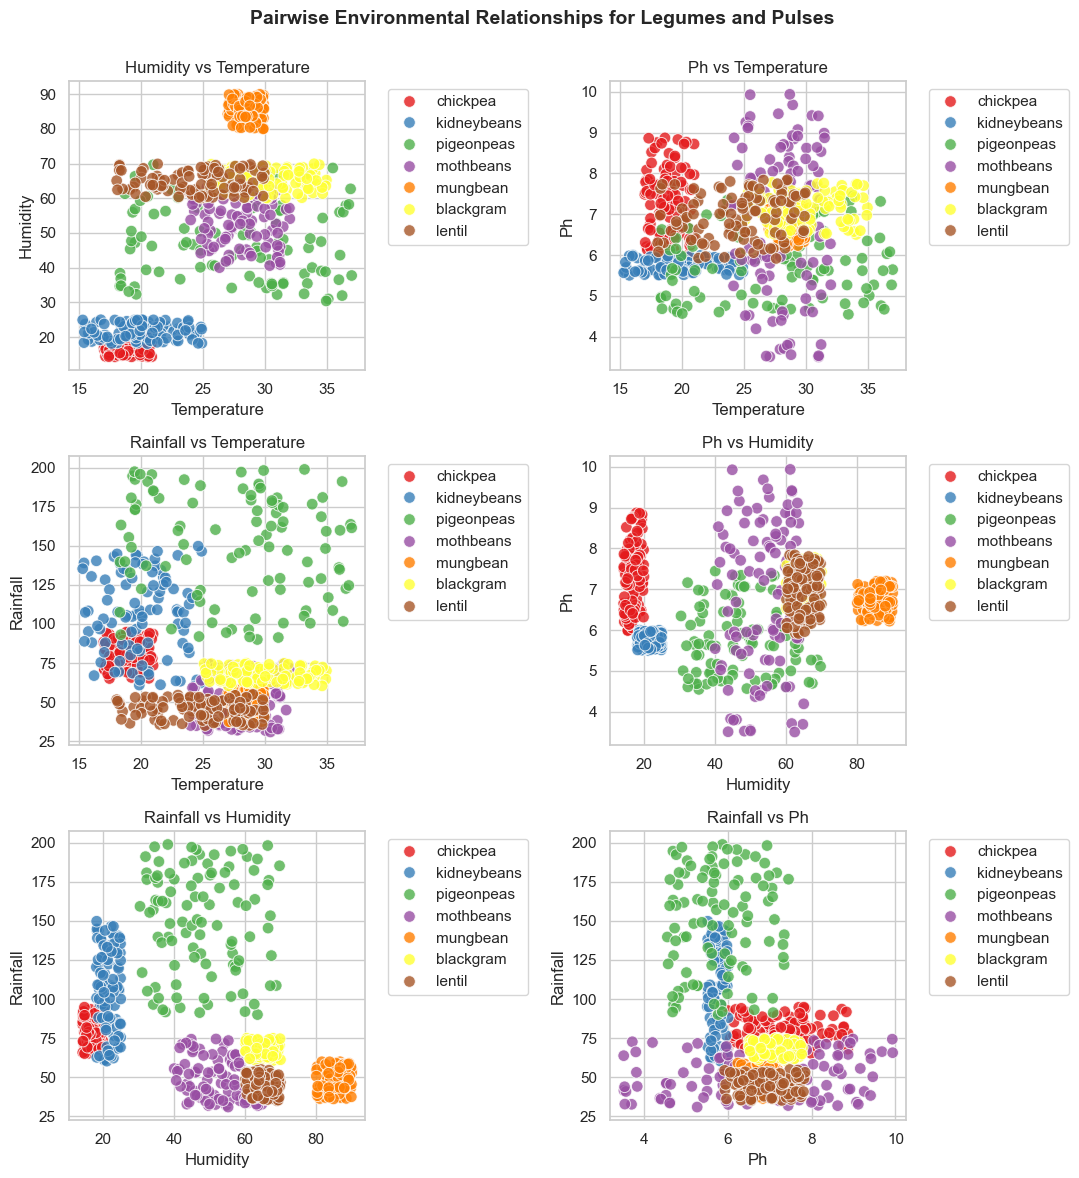

In [ ]:
# Loop through each combination and plot in a subplot

plt.figure(figsize=(11, 4 * n_rows))
for idx, (x_feature, y_feature) in enumerate(feature_combinations, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.scatterplot(
        data=df_pulses_legumes,
        x=x_feature,
        y=y_feature,
        hue=target,
        palette='Set1',
        alpha=0.8,
        s=70
    )
    plt.suptitle("Pairwise Environmental Relationships for Legumes and Pulses\n", fontsize = 14, fontweight = 'bold' )
    plt.title(f"{y_feature.capitalize()} vs {x_feature.capitalize()}")
    plt.xlabel(x_feature.capitalize())
    plt.ylabel(y_feature.capitalize())
    plt.legend(title=False, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Environmental Relationship Insights for Pulses and Legumes**

- Mungbean and Pigeonpeas grow in hot, moderately humid climates, while Chickpea and Kidneybean prefer cool, dry environments.

- Pigeonpeas and kidneybeans thrive in high-rainfall (150 -200 mm) regions - typical rainfed crops. Chickpea, lentil, and mothbeans adapt to low-rainfall (25 - 75 mm), making them suitable for  dryland areas.

- Kidneybeans and pigeonpeas tolerate acidic soils (pH 5 - 6) with heavy rainfall, while chickpea and lentil prefer neutral to slightly alkaline soils.



#### 4.3.3 Fruit Crops

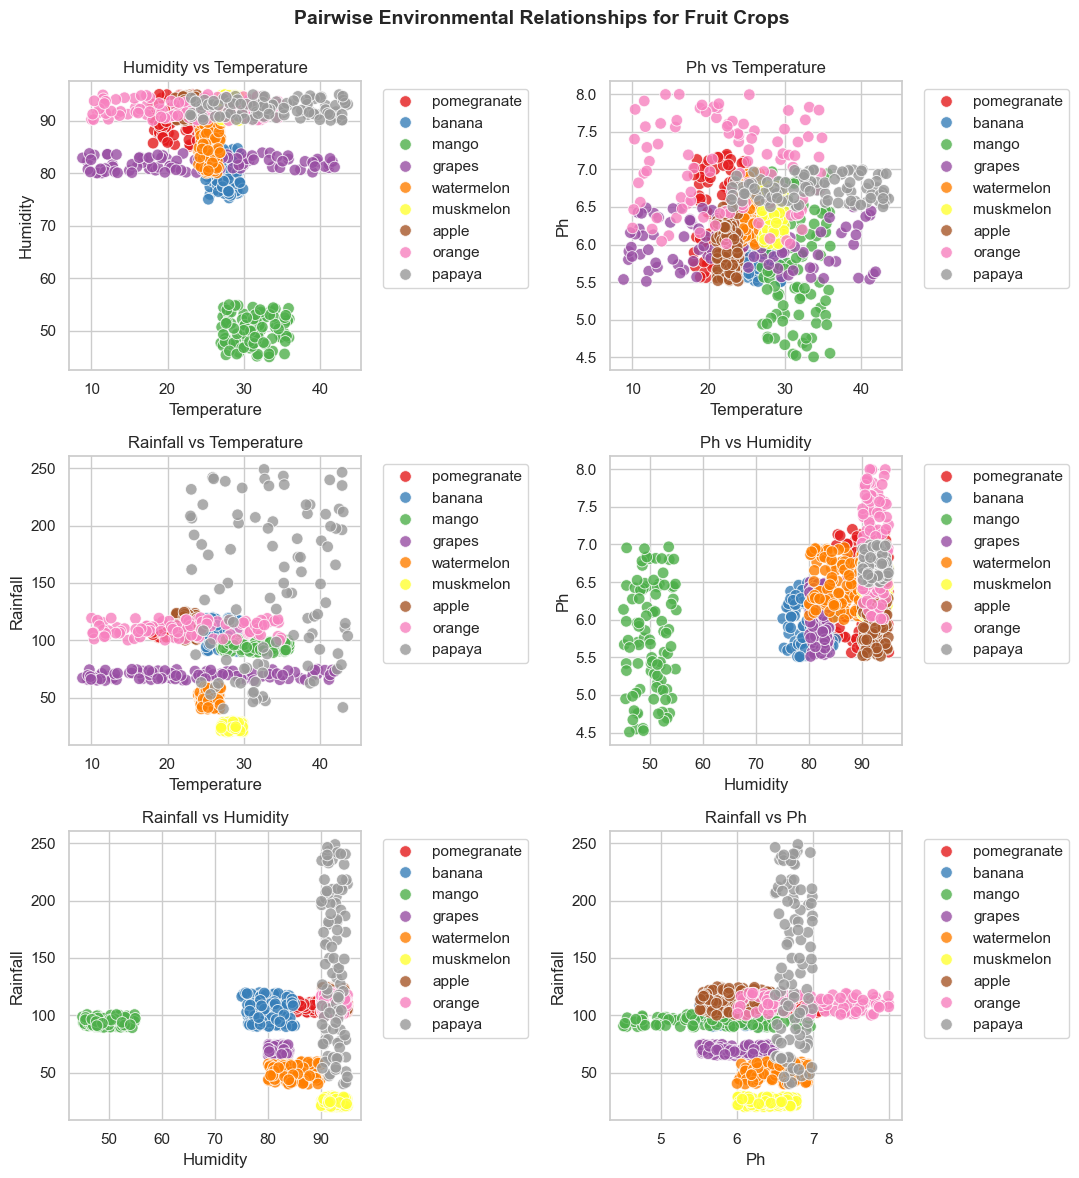

In [189]:

plt.figure(figsize=(11, 4 * n_rows))


for idx, (x_feature, y_feature) in enumerate(feature_combinations, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.scatterplot(
        data = df_fruits,
        x = x_feature,
        y = y_feature,
        hue = target,
        palette = 'Set1',
        alpha = 0.8,
        s = 70
    )
    plt.suptitle("Pairwise Environmental Relationships for Fruit Crops\n", fontsize = 14, fontweight = 'bold' )
    plt.title(f"{y_feature.capitalize()} vs {x_feature.capitalize()}")
    plt.xlabel(x_feature.capitalize())
    plt.ylabel(y_feature.capitalize())
    plt.legend(title=False, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Environmental Relationship Insights for Fruit Crop**

- Banana, papaya, and applthrive in hot, humid conditions, while mango prefer hotter or moderately dry climates.

- Papaya grow high-rainfall (150 - 250 mm) zones. Muskmellon, watermellon perform well in lower-rainfall (50 - 100 mm) regions 

- Papaya tolerate acidic soils (pH 5–6) combined with high humidity and rainfall, oranges grow in higly acidic regions.



#### 4.3.4 Fiber Crops

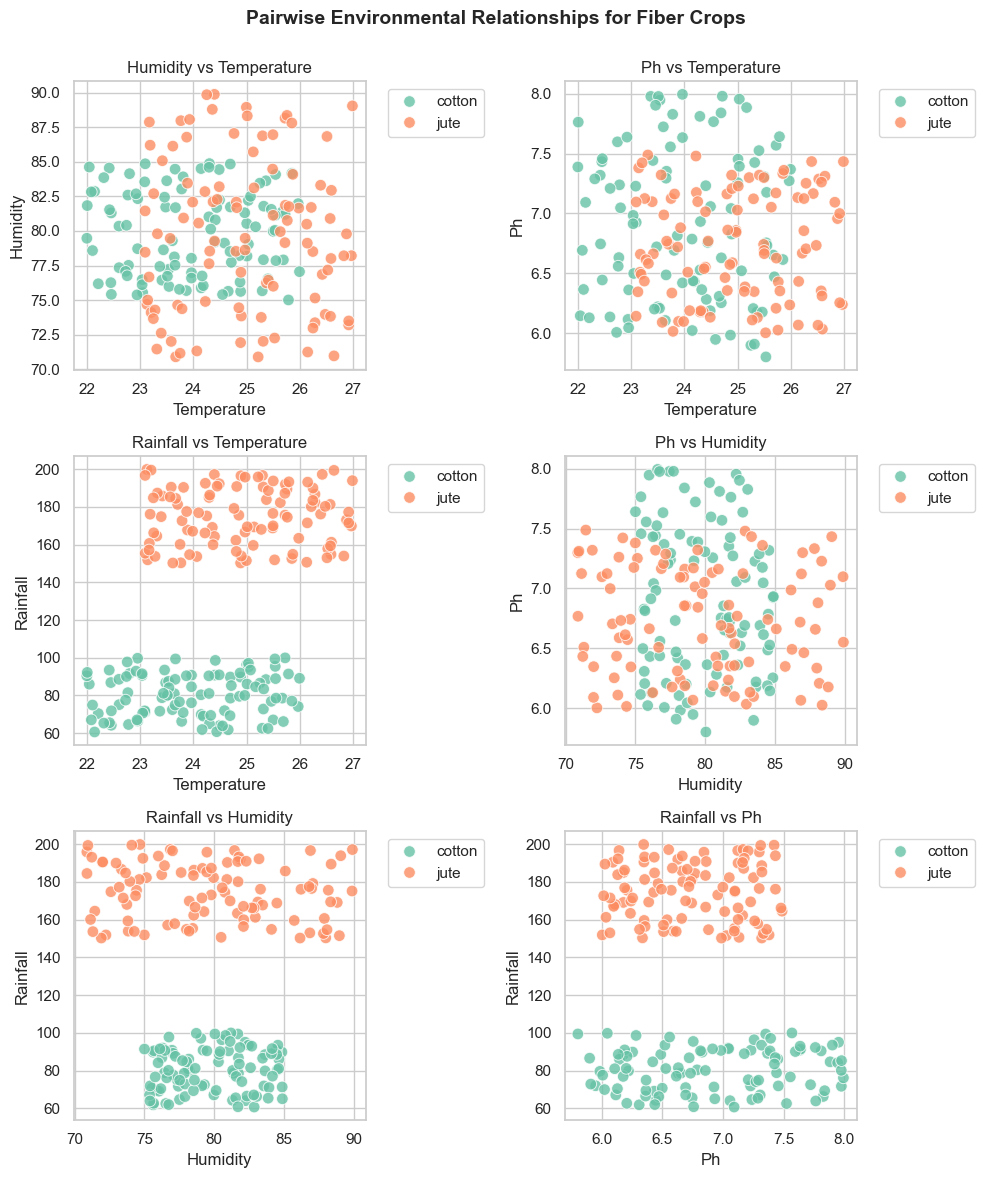

In [190]:

plt.figure(figsize=(10, 4 * n_rows))

# Loop through each combination and plot in a subplot
for idx, (x_feature, y_feature) in enumerate(feature_combinations, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.scatterplot(
        data = df_fiber_crops,
        x = x_feature,
        y = y_feature,
        hue = target,
        palette = 'Set2',
        alpha = 0.8,
        s = 70
    )
    plt.suptitle("Pairwise Environmental Relationships for Fiber Crops\n", fontsize = 14, fontweight = 'bold' )
    plt.title(f"{y_feature.capitalize()} vs {x_feature.capitalize()}")
    plt.xlabel(x_feature.capitalize())
    plt.ylabel(y_feature.capitalize())
    plt.legend(title = False, bbox_to_anchor = (1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Environmental Relationship Insights for Fiber Crops**

- Cotton grows best in warm conditions with moderate humidity, while Jute prefers high humidity and slightly cooler temperatures.  

- Jute thrives in high-rainfall regions (150–200 mm), making it ideal for rainfed or floodplain areas. Cotton, with rainfall around 60-100 mm, is better suited for dryland or irrigated regions.  

- Jute tolerates slightly acidic to neutral soils (pH 6-7), whereas Cotton performs well in neutral to mildly alkaline soils (pH 7-8). 

- Humidity requirement for cotton in more specifi (75-85 %), while jute tolerate a widere humidity requirement

#### 4.3.4 Beverage Crops

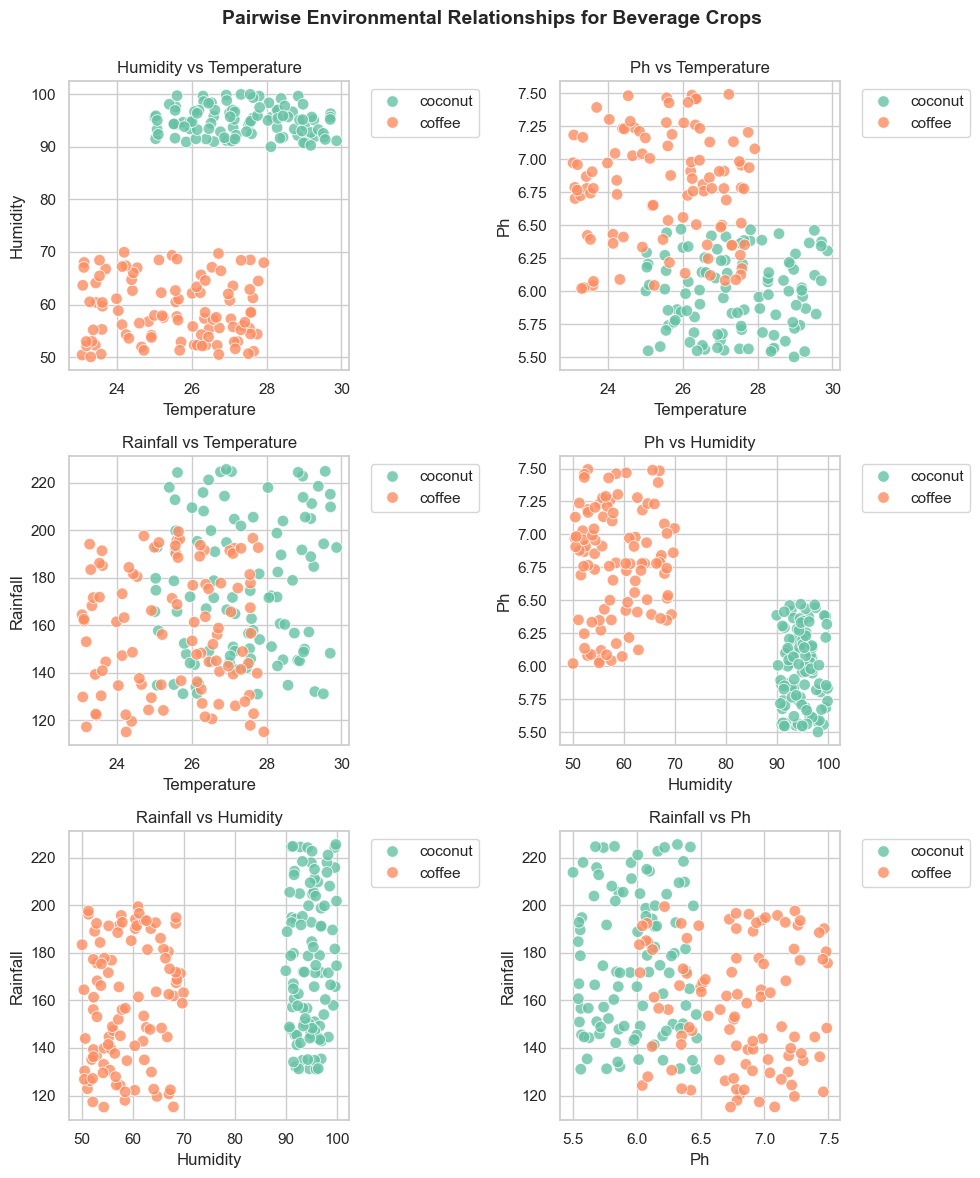

In [250]:
plt.figure(figsize=(10, 4 * n_rows))

for idx, (x_feature, y_feature) in enumerate(feature_combinations, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.scatterplot(
        data = df_beverage,
        x = x_feature,
        y = y_feature,
        hue = target,
        palette = 'Set2',
        alpha = 0.8,
        s = 70
    )
    plt.suptitle("Pairwise Environmental Relationships for Beverage Crops\n", fontsize = 14, fontweight = 'bold' )
    plt.title(f"{y_feature.capitalize()} vs {x_feature.capitalize()}")
    plt.xlabel(x_feature.capitalize())
    plt.ylabel(y_feature.capitalize())
    plt.legend(title=False, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Environmental Relationship Insights for Beverage Crops**

- Coconut grows well in hot, humid climates with humidity levels between 90-100%, while Coffee prefers moderate humidity (50-70%) and slightly cooler temperatures.  

- Coconut requires high rainfall (180-220 mm), making it suitable for coastal and tropical regions. Coffee grows under moderate rainfall (130-180 mm) 

- Coconut thrives in more acidic soils than coffee.


 ### 4.4 Correlation Heatmap

A correlation heatmap will help visualize how numerical features relate to each other.  It reveals which variables move together or in opposite directions, helping to spot redundant or independent features.  

Here, it’s used to explore relationships among soil nutrients (N, P, K) and environmental factors (temperature, humidity, rainfall, pH) before modeling.

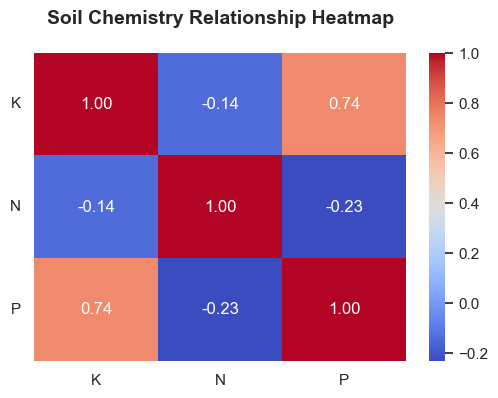

In [234]:
# Correlation Heatmap for the soil elements
corr_soil = df[['K','N','P']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_soil, 
            annot = True, 
            cmap ='coolwarm', 
            fmt = ".2f")
plt.yticks(rotation = 0)
plt.title("Soil Chemistry Relationship Heatmap\n", fontsize = 14, fontweight = 'bold')
plt.show()

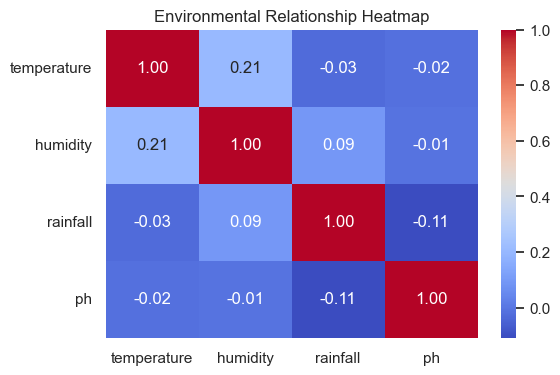

In [230]:
# Correlation Heatmap for the environmental factors
corr_envi = df[['temperature','humidity','rainfall','ph']].corr()

plt.figure(figsize=(6,4))

sns.heatmap(corr_envi, 
            annot = True, 
            cmap = 'coolwarm', 
            fmt = ".2f")
plt.yticks(rotation = 0)
plt.title("Environmental Relationship Heatmap")
plt.show()

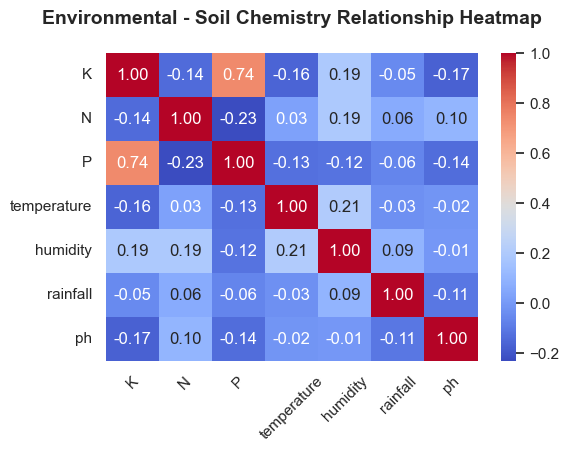

In [235]:
# Correlation heatmaps for all variables
corr = df[['K','N','P','temperature','humidity','rainfall','ph']].corr()

plt.figure(figsize=(6,4))

sns.heatmap(corr,
            annot = True, 
            cmap = 'coolwarm', 
            fmt = ".2f"
            )
plt.xticks(rotation = 45)
plt.title("Environmental - Soil Chemistry Relationship Heatmap\n", fontsize = 14, fontweight = 'bold')
plt.show()

The heatmaps show that most variables have weak correlations ( < 0.2), indicating that they contribute independent information to the dataset.  

- Phosphorus (P) and Potassium (K), exhibit a moderately strong positive correlation (0.74), suggesting these soil nutrients tend to increase together. 

- Other pairs, such as temperature, humidity, rainfall, and pH, show slow or near-zero correlations, meaning they vary independently.  

- This independence is desirable for modeling since it reduces the risk of multicollinearity and ensures each factor provides unique predictive value.

### 4.5 Environmetal Factors Distribution

Basically we are are trying to find the distribution of environmental factors for each crops. To make the viz more usefull, I have classified each crop based on the style; i.e cereals, pulses, fruits, fibers, beverages. 

In [ ]:
# Creating a dictionary of crop styles depending on the crop type
crop_style = {'rice':'cereal_grains',
              'maize':'cereal_grains',
              'chickpea':'pulses_legumes',
              'kidneybeans':'pulses_legumes',
              'pigeonpeas':'pulses_legumes',
              'mothbeans':'pulses_legumes',
              'mungbean':'pulses_legumes',
              'blackgram':'pulses_legumes',
              'lentil':'pulses_legumes',
              'cotton':'fiber_crops',
              'jute':'fiber_crops',
              'pomegranate':'fruits',
              'banana':'fruits',
              'mango':'fruits',
              'grapes':'fruits',
              'watermelon':'fruits',
              'muskmelon':'fruits',
              'apple':'fruits',
              'orange':'fruits',
              'papaya':'fruits',
              'coconut':'beverages',
              'coffee':'beverages'
              }

In [ ]:
# Mapping each record to the crop type
df['crop_type'] = df['label'].map(crop_style)
df.sample(n = 10, random_state = 42)

,N,P,K,temperature,humidity,ph,rainfall,label,crop_type
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,muskmelon,fruits
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,watermelon,fruits
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya,fruits
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,papaya,fruits
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,apple,fruits
1110,18,19,27,27.755187,52.346058,4.772386,94.112133,mango,fruits
1594,35,145,195,22.039115,94.580758,6.231950,110.980401,apple,fruits
530,22,44,24,24.309351,56.329383,6.030447,58.995363,mothbeans,pulses_legumes
651,11,46,24,27.652802,89.806506,6.459252,56.525580,mungbean,pulses_legumes
819,3,78,18,20.213682,68.652577,6.887130,50.897330,lentil,pulses_legumes


#### 4.5.1 Rainfall Distribution

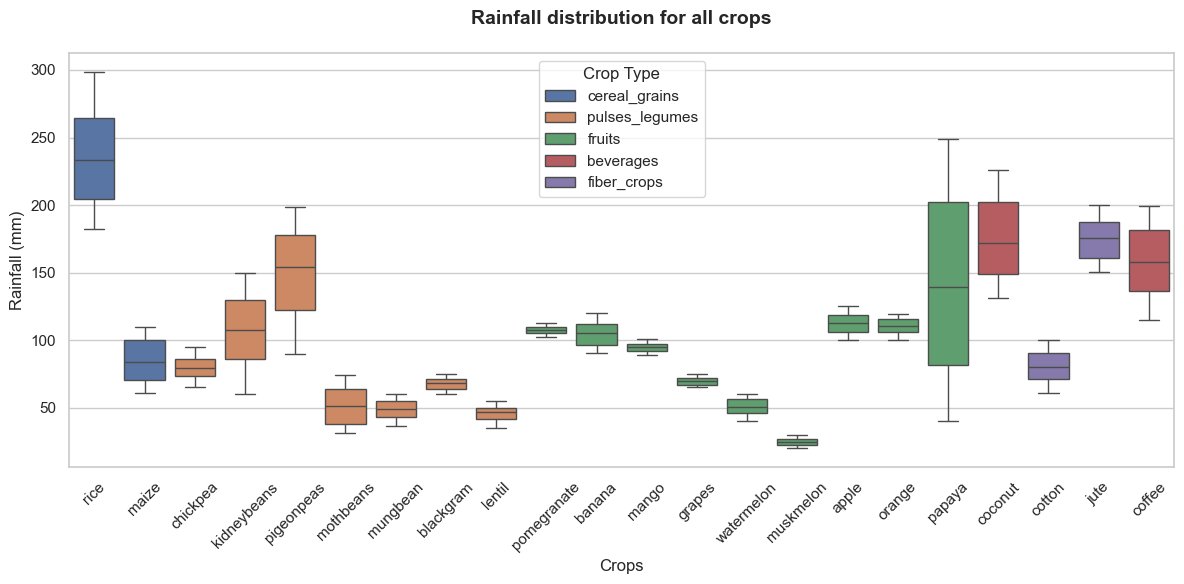

In [236]:
# Rainfall Distribution

plt.figure(figsize=(12,6))

# Plotting box and whiskers plot
sns.boxplot(x = 'label', 
            y = 'rainfall', 
            data = df, 
            hue = 'crop_type'
            )
plt.xticks(rotation = 45)
plt.title('Rainfall distribution for all crops\n', fontsize = 14, fontweight = 'bold')
plt.ylabel("Rainfall (mm)")
plt.xlabel("Crops")
plt.legend(title = 'Crop Type')
plt.tight_layout()
plt.show()

**Observations on Rainfall Distribution for All Crops**

- Rice needs the most rainfall (200-300 mm), showing strong dependence on wet conditions. 

- Pulses and legumes like mungbean and lentil grow in low rainfall (<80 mm), suiting dryland areas.

- Fruits such as muskmelon and watemelon thrive in moderate rainfall (<70 mm), while papaya adapts across a wide range.  

- Coconut and coffee prefer high rainfall (150–200 mm), and fiber crops like cotton and jute need moderate to high rainfall for good yield.

#### 4.5.2 Temperature Distribution

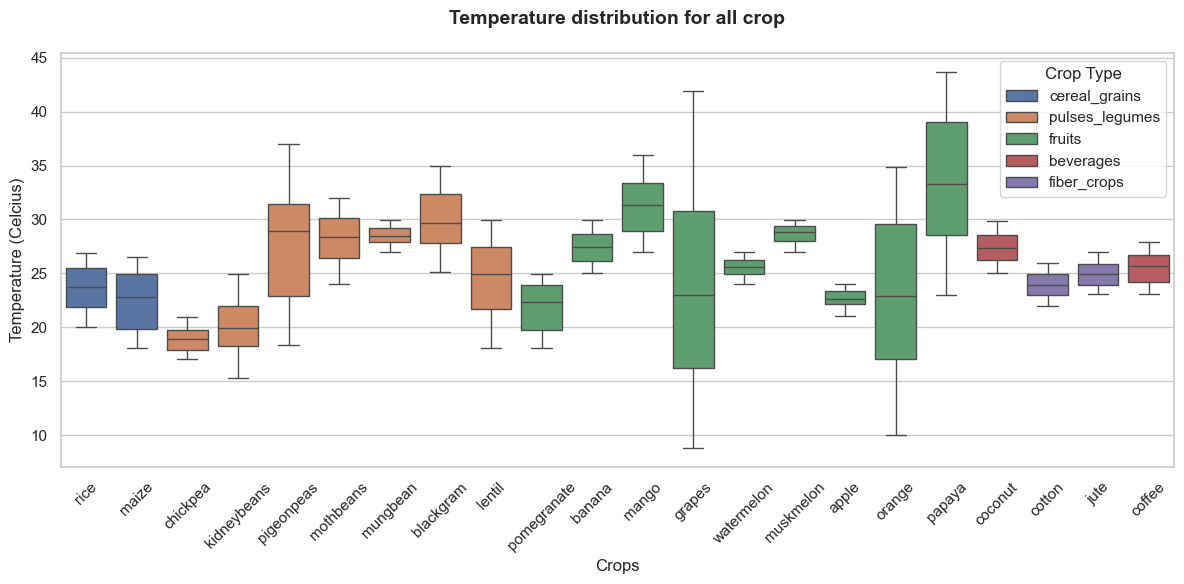

In [237]:
# Temperatue Distribution

plt.figure(figsize=(12,6))

# Plotting box and whiskers plot
sns.boxplot(x = 'label', 
            y = 'temperature', 
            data = df, 
            hue = 'crop_type'
            )
plt.xticks(rotation=45)
plt.title('Temperature distribution for all crop\n', fontsize = 14, fontweight = 'bold' )
plt.ylabel("Temperature (Celcius)")
plt.xlabel("Crops")
plt.legend(title = 'Crop Type')
plt.tight_layout()
plt.show()

**Observations on Temperature Distribution for All Crops**

- Cereal crops like rice and maize grow best in moderate temperatures (20-27 C).  

- Pulses such as chickpea and kidneybean prefer cooler climates (15-25 C), while pigeonpeas and blackgram tolerate warmer conditions (28-35 C).  

- Fruits like grapes, oranges grow in a wider ranges (10-42 C), whereas apple and  prefer narrower ranges (20-25 C).  

- Beverage crops and fibers, including coffee, jute, cotton, and coconut, grow well within a more defined range (22-30 C).

#### 4.5.3 Humidity Distribution

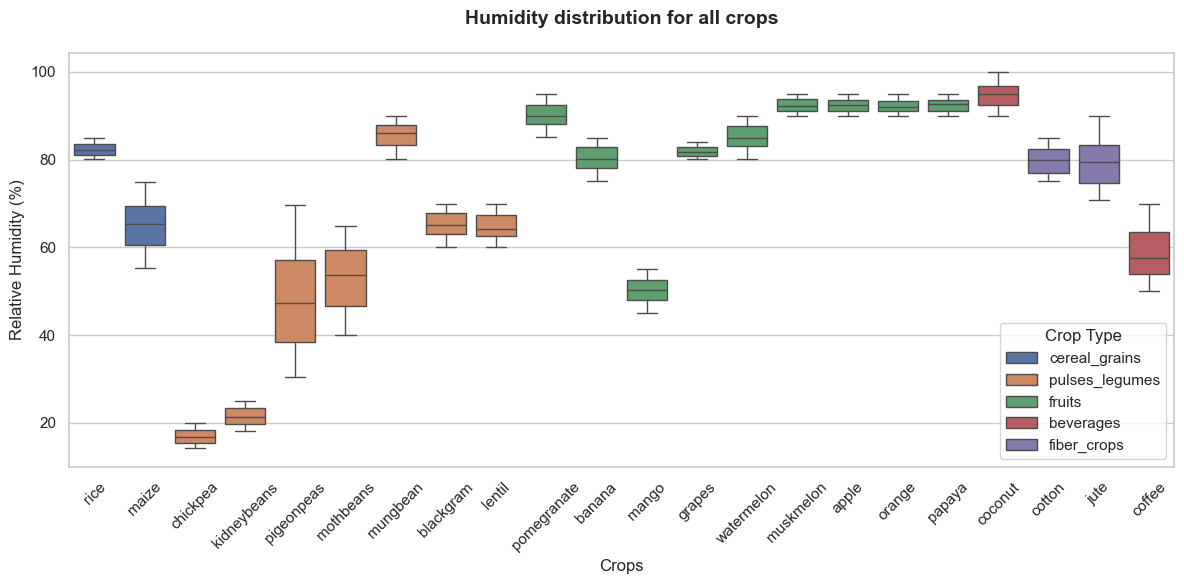

In [238]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'label', 
            y = 'humidity', 
            data = df, 
            hue = 'crop_type')
plt.xticks(rotation = 45)
plt.title('Humidity distribution for all crops\n', fontsize = 14, fontweight = 'bold')
plt.ylabel("Relative Humidity (%)")
plt.xlabel("Crops")
plt.legend(title = 'Crop Type')
plt.tight_layout()
plt.show()

**Observations on Humidity Distribution for All Crops**

- Rice grows in high humidity (around 80-85%), while maize prefers moderate levels (60-70%).  

- Pulses such as chickpea, kidneybean thrive in low humidity, while other pulses like mungbean preder very high humidity, thus showing adaptatbity  to dry conditions.  

- Fruit cropsgrow best in very humid environments (85-95%), except for mango which prefers a slightly less humid condition (~55%) 

- Coconut also favors high humidity (> 100%), whereas coffee grow in moderately humid climates (60-80%).  


### 4.6 ANOVA 
One-way ANOVA test is performed to determine if key environmental factors i.e temperature, humidity, and rainfall differ significantly across different crop types. By comparing the mean values of these variables among crop groups, ANOVA will helps identify which environmental factors contribute most to crop variability. This analysis provides a statistical foundation for understanding how climate conditions influence crop suitability and supports the development of a more accurate crop recommendation model.
#### 4.6.1 Temperature

In [200]:
from scipy.stats import f_oneway
# Ensure crop_types is defined from your DataFrame 'df'
crop_types = df['label'].unique()

# Preparing a list of temperature values for each crop type
temperature_lists = [df[df['label'] == crop]['temperature'] for crop in crop_types]

# Performing the ANOVA test for temperature
anova_result_temperature = f_oneway(*temperature_lists)

anova_result_temperature

F_onewayResult(statistic=102.18698122995393, pvalue=4.019323818173197e-305)

#### 4.6.2 Humidity

In [201]:
# Preparing a list of humidity values for each crop type
humidity_lists = [df[df['label'] == crop]['humidity'] for crop in crop_types]

# Performing the ANOVA test for temperature
anova_result_humidity = f_oneway(*humidity_lists)

anova_result_humidity

F_onewayResult(statistic=3103.708891217461, pvalue=0.0)

#### 4.6.3 Rainfall

In [222]:
# Preparing a list of rainfall values for each crop type
rainfall_lists = [df[df['label'] == crop]['rainfall'] for crop in crop_types]

# Performing the ANOVA test for temperature
anova_result_rainfall = f_oneway(*rainfall_lists)

anova_result_rainfall

F_onewayResult(statistic=605.5279661441423, pvalue=0.0)

 **ANOVA Summary Table for Environmental Factors**

| Factor | F-statistic | p-value |
|:--------|-------------:|---------------:|
| **Temperature** | 102.1869 | 4.02 × 10⁻³⁰⁵ |
| **Humidity** | 3103.7089 | 0.0000 |
| **Rainfall** | 605.5280 | 0.0000 |


One-way ANOVA tests; conducted to assess whether the mean values of temperature, humidity, and rainfall differ significantly across various crop types show that all three factors exhibit statistically significant variation between crops (p < 0.05).
Humidity had the highest F-statistic (3103.71), indicating it varies the most among crop types and is likely the strongest environmental predictor. Rainfall (F = 605.53) and temperature (F = 102.19) also show significant but relatively smaller differences.
These findings suggest that environmental conditions, particularly humidity and rainfall, play a crucial role in determining crop suitability, making them key candidates for predictive modeling in crop recommendation systems.

## 5. Predictive Modeling
### 5.1 Environmental Factors Modeling
Given that environment conditions are major factors in a crop growth, I have made use of a decision tree predictive models that  will be used to predict the most suitable crop for a given combination of environmental conditions.  

In [203]:
# Feature selection
features = ['temperature','humidity', 'rainfall']
X = df[features]
y = df['label']

In [204]:
# Encoding crop names to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [205]:
# Data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
# Decision Tree training
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [207]:
# Prediction
y_pred = model.predict(X_test)

In [208]:
# Model performance
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9068181818181819

Classification Report:
               precision    recall  f1-score   support

       apple       0.90      0.83      0.86        23
      banana       0.87      0.95      0.91        21
   blackgram       0.89      0.80      0.84        20
    chickpea       0.96      0.96      0.96        26
     coconut       0.93      0.93      0.93        27
      coffee       0.94      0.94      0.94        17
      cotton       0.84      0.94      0.89        17
      grapes       1.00      0.93      0.96        14
        jute       0.92      0.96      0.94        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.85      1.00      0.92        11
       maize       0.90      0.86      0.88        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.88      0.88      0.88        24
    mungbean       1.00      0.95      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.55    

 **Model Performance Analysis**

- With an accuracy of 0.906 (~ 91%), the model correctly predicts the crop type in 9 out of 10 cases, which is a strong performance for a multi-class classification task with many crop categories.

- Macro Avg F1-score is  0.91.  This shows that the model performs consistently across all crop types, not just those with more samples.

- The model has a weighted avg F1 score of 0.91. This confirms that the model maintains balanced performance even when accounting for class frequency differences.

 **Per-Crop Insights**

- Outstanding performers: 
  Chickpea, coffee, kidneybeans, mungbean, muskmelon, mango all show F1-scores ≥ 0.94, meaning the model almost always predicts these crops correctly.

- Moderate performers:
  Apples, blackgram, cotton, maize, mothbeans, lentil, pigeonpeas, banana - F1-scores in the 0.85–0.91 range; predictions are still reliable.

- Weaker performers: 
  For orange (F1 = 0.67) and pomegranate (F1 = 0.77), the model struggles more with these crops.



### 5.2 Soil Chemistry Modeling

As the nutrient concentration of the soil is equally important for crop growth, I have considered soil nuntrient as input features to build another decision tree model. From correlation analysis, it was found out that P and K has high correlationship of 0.74. Based on this result, I have made two models - one that considers all features, another one that has reduced features.

In [209]:
# Considering the reduced features as P and K are high correlated
features_reduced = ['N', 'P', 'ph']
X_reduced = df[features_reduced]

In [ ]:
# Considering all the soil nurtients
features_all = ['N', 'P', 'K', 'ph']
X_all = df[features_all]

In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Encode target
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df['label'])

# Split for both models
from sklearn.model_selection import train_test_split
X_train_A, X_test_A, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
X_train_B, X_test_B, _, _ = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train
tree_A = DecisionTreeClassifier(random_state=42).fit(X_train_A, y_train)
tree_B = DecisionTreeClassifier(random_state=42).fit(X_train_B, y_train)

# Evaluate
acc_A = accuracy_score(y_test, tree_A.predict(X_test_A))
acc_B = accuracy_score(y_test, tree_B.predict(X_test_B))
print('--------------------------------------------------')
print(f"Model A (All soil features) Accuracy: {acc_A:.3f}")
print(f"Model B (Reduced features) Accuracy: {acc_B:.3f}")
print('--------------------------------------------------')

--------------------------------------------------
Model A (All soil features) Accuracy: 0.780
Model B (Reduced features) Accuracy: 0.577
--------------------------------------------------


Soil Chemistry-Based Decision Tree Model Comparison

| Model | Features Used | Accuracy |
|--------|----------------|-----------|
| Model A (All Soil Features) | N, P, K, pH | 0.78 |
| Model B (Reduced Features) | N, P, pH | 0.58 |

**Interpretation:** Removing K caused a significant accuracy drop (from 78% to 58%) athough these features had a correlation of 0.74  


### 5.3 Comparative Analysis of the three models

After performing individual decision tree models using two different feature sets,  
we can compare their predictive performance and interpret the relative influence of environmental and soil chemistry factors on crop classification.

| Model | Feature Type | Features Used | Accuracy | Interpretation |
|:-------|:--------------|:------------------|:-----------:|:-----------------------------|
| Environmental Model | Climatic | Temperature, Humidity, Rainfall |0.91 | Excellent performance - crops are highly influenced by environmental conditions. |
|Soil Chemistry Model (All Features) | Nutrient-based | N, P, K, pH | 0.78 | Good performance - soil nutrients contribute strongly but less than climate. |
| Soil Chemistry Model (Reduced) | Nutrient-based | N, P, pH | 0.58 | Performance drops significantly without K, showing P and K are both important. |


- The Environmental Model achieved the highest accuracy (91%); confirming that temperature, humidity, and rainfall are dominant predictors of crop type.  
- The Soil Chemistry Model also performed well (78%) but was less accurate - suggesting that while soil nutrients matter, climatic conditions have a stronger overall influence on crop suitability.  
- Removing Potassium (K) resulted in a 20% drop in soil model accuracy.
- Both models show that environmental and soil features are complementary, not interchangeable.


## 6. Future Work

   
1. Try ensemble methods such as  Random Forest, XGBoost to boost accuracy and stability.  
2. Tune hyperparameters to reduce overfitting and improve minority crop detection.  
3. Balance the dataset if certain crops have fewer samples.


## 7. Conclusion

This study demonstrated how environmental and soil factors influence crop suitability. Exploratory analysis and ANOVA results confirmed that temperature, humidity, and rainfall vary significantly across crop types, with humidity showing the strongest impact. Pairwise and distribution visualizations revealed clear environmental patterns among cereals, pulses, fruits, fibers, and beverage crops. Predictive modeling further emphasized that combining soil and environmental features improves accuracy in crop classification. Overall, the analysis provides a solid foundation for building data-assisted crop recommendation systems that align with local climate conditions and soil chemistry.

## 8. What I Learned...

Working through this project provided hands-on experience in using data to draw meaningful agricultural insights. I learned how to design an analysis flow that moves logically from data exploration to hypothesis testing and modeling. Statistical validation through ANOVA deepened my understanding of feature importance, while visualization helped me communicate those differences clearly. The machine learning modeling section taught me how to balance data-driven precision with domain reasoning.